## Final Project Submission

Please fill out:
* Student name: Okuda Pascal
* Student pace: part time
* Scheduled project review date/time: 05/02/2023 11PM
* Instructor name: Samuel Jane/Roselynn
* Blog post URL:


In [143]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
import numpy as np

In [50]:
#import the 3 datasets
# bom.movie_gross - dataset
df_bom = pd.read_csv("zippedData/bom.movie_gross.csv")
# imdb.title.ratings - dataset
df_rating = pd.read_csv("zippedData/title.ratings.csv")
# imdb.title.basics - dataset
df_basics = pd.read_csv("zippedData/title.basics.csv")

# Working with Bom movie Dataset

In [51]:
# Access the first 5 cases
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [52]:
# Access the lat 5 cases
df_bom.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [53]:
# Description of the number of columns and rows in the dataset 
print("The bom movie dataset has",df_bom.shape[0], "rows and",df_bom.shape[1],"columns.")

The bom movie dataset has 3387 rows and 5 columns.


In [54]:
# Access the data features and the missing in data
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [55]:
# Number of missing per variable in the dataset
df_bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

### Dealing with the missing cases in the data. First we access the count of missing and sort out the best way to deal with the missing data.
* Studio variable has 5 cases of misisng, sice it a smaller count of missing, I will replace the NAN with the empty cell say, " " 

In [56]:
# Dealing with studio missing
df_bom['studio'].fillna(" ",inplace = True)

Next we focus on the domestric gross variable and look at the level of missing. Since we have 28 cases missing,
we can correct that using the median value
Median is the best way to use to correct for the missing cases since its considers the distribution of the data

In [57]:
# Using median to replace the NAs and inplcae to effect the changes in the data
df_bom['domestic_gross'].fillna(df_bom['domestic_gross'].median(), inplace = True)

The final variable has many observation that are missing. 
Let me start with calculating the proportion of missing in the data of this specific variable

In [58]:
# Investigate the proportion of missing on foreign_gross variable
f_gross_missing = df_bom['foreign_gross'].isna().sum()
f_gross_count = len(df_bom['foreign_gross'])
f_gross_proportion = round(f_gross_missing/f_gross_count*100,2)
print("Foreign gross proportion is ", f_gross_proportion)

Foreign gross proportion is  39.86


Next,  I will focus on imputing the NAs on the foreign gross variable. Since approximately 40% of the data is missing, I won't drop the cases but I will try replace them using the median

In [62]:
# Change the values to numeric from string
df_bom['foreign_gross'] = pd.to_numeric(df_bom['foreign_gross'], errors='coerce')
#Impute the missing with the variable median values
df_bom['foreign_gross'].fillna(df_bom['foreign_gross'].median(),inplace = True)

In [63]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [64]:
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


##### Duplicates
* Next I will focus on checking for duplicates in the dataset. First, check for duplication and if any, I will have to remove them

In [69]:
# Assessing the duplicatess
duplicates = df_bom.duplicated()
duplicates.value_counts()

False    3387
dtype: int64

 * From the above code, no duplicates in the dataset. Good to go.

## Visualization of the key variables

In [94]:
# Unique count of studio categories
df_bom['studio'].value_counts().head(30)

IFC        166
Uni.       147
WB         140
Fox        136
Magn.      136
SPC        123
Sony       110
BV         106
LGF        103
Par.       101
Eros        89
Wein.       77
CL          74
Strand      68
FoxS        67
RAtt.       66
KL          62
Focus       60
WGUSA       58
CJ          56
MBox        54
UTV         50
A24         49
WB (NL)     45
FM          42
LG/S        41
Cohen       40
ORF         37
SGem        35
Rela.       35
Name: studio, dtype: int64

### Studio and domestric gross
* From the above code, we get many categories of studio and different counts, now I will pick the most frequent counts say top 15 categories.

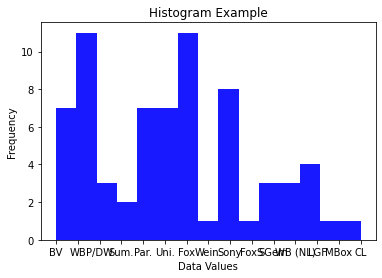

In [123]:
# Plot the histogram of studio
# Subset of dataset - studio and domestic_gross
studio = df_bom['studio']
# Frequncy of each category
Freq_studio = studio.value_counts()

# Select the most frequent studios say 15
Freq_studio_15 = Freq_studio[:6]
plt.hist(studio[:70], bins=15,color = 'blue', alpha=0.9)

# Add labels and title
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.title('Histogram Example')

# Show the plot
plt.show()

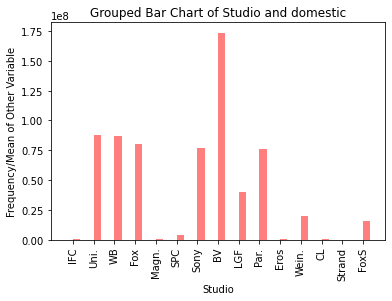

In [126]:
# Extract the studio column and the other variable from the dataframe
studio = df_bom['studio']
domestric = df_bom['domestic_gross']

# Calculate the frequency of each category in the studio variable
frequency = studio.value_counts()

# Select the top 10 most frequent categories in the studio variable
top_15 = frequency[:15]

# Group the data by studio and calculate the mean of the other variable for each group
grouped = df_bom.groupby('studio')['domestic_gross'].mean()
top_15_grouped = grouped[top_15.index]

# Create a grouped bar chart of the top 15 categories in the studio and domestric variables
studio_index = range(len(top_15))
bar_width = 0.35
plt.bar(studio_index, top_15, bar_width, color='blue', alpha=0.5)
plt.bar([i + bar_width for i in studio_index], top_15_grouped, bar_width, color='red', alpha=0.5)

# Add labels and title
plt.xticks([i + bar_width/2 for i in studio_index], top_15.index, rotation=90)
plt.xlabel('Studio')
plt.ylabel('Frequency/Mean of Other Variable')
plt.title('Grouped Bar Chart of Studio and domestic')

# Show the plot
plt.show()


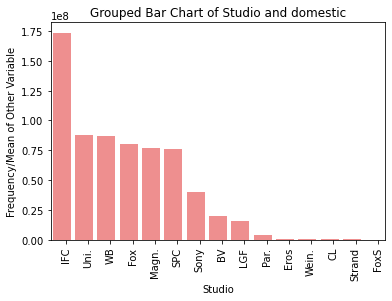

In [138]:
# Extract the studio column and the other variable from the dataframe
studio = df_bom['studio']
domestric = df_bom['domestic_gross']

# Calculate the frequency of each category in the studio variable
frequency = studio.value_counts()

# Select the top most frequent categories in the studio variable
top_15 = frequency[:15]

# Group the data by studio and calculate the mean of the other variable for each group
grouped = df_bom.groupby('studio')['domestic_gross'].mean()

top_15_grouped = grouped[top_15.index]
# Combine the frequency data and the grouped data into a single dataframe
data = pd.DataFrame({'frequency': top_15, 'mean_domestric': top_15_grouped})

# Sort the data in descending order of the mean of the other variable
data = data.sort_values(by='mean_domestric', ascending=False)

# Create a grouped bar chart of the top 15 categories in the studio and domestric variables
sns.barplot(x=data.index, y='frequency', data=data, color='blue', alpha=0.5)
sns.barplot(x=data.index, y='mean_domestric', data=data, color='red', alpha=0.5)

# Add labels and title
plt.xticks([i + bar_width/2 for i in studio_index], top_15.index, rotation=90)
plt.xlabel('Studio')
plt.ylabel('Frequency/Mean of domestric gross')
plt.title('Grouped Bar Chart of Studio and domestic')

# Show the plot
plt.show()

### Studio and foreign gross
* From the above code, we get many categories of studio and different counts, now I will pick the most frequent counts say top 15 categories.

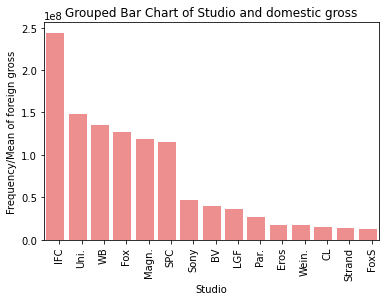

In [156]:
# Extract the studio column and the other variable from the dataframe
studio = df_bom['studio']
foreign = df_bom['foreign_gross']

# Calculate the frequency of each category in the studio variable
frequency = studio.value_counts()

# Select the top most frequent categories in the studio variable
top_15 = frequency[:15]

# Group the data by studio and calculate the mean of the other variable for each group
grouped = df_bom.groupby('studio')['foreign_gross'].mean()

top_15_grouped = grouped[top_15.index]
# Combine the frequency data and the grouped data into a single dataframe
data = pd.DataFrame({'frequency': top_15, 'mean_foreign': top_15_grouped})

# Sort the data in descending order of the mean of the other variable
data = data.sort_values(by='mean_foreign', ascending=False)

# Create a grouped bar chart of the top 15 categories in the studio and domestric variables
sns.barplot(x=data.index, y='frequency', data=data, color='blue', alpha=0.5)
sns.barplot(x=data.index, y='mean_foreign', data=data, color='red', alpha=0.5)

# Add labels and title
plt.xticks([i + bar_width/2 for i in studio_index], top_15.index, rotation=90)
plt.xlabel('Studio')
plt.ylabel('Frequency/Mean of foreign gross')
plt.title('Grouped Bar Chart of Studio and foreign gross')

# Show the plot
plt.show()

# Working with rating movie Dataset

In [157]:
# Access the first 5 cases
df_rating.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [158]:
# Access the lat 5 cases
df_rating.tail()

,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [160]:
# Description of the number of columns and rows in the dataset 
print("The rating movie dataset has",df_rating.shape[0], "rows and",df_rating.shape[1],"columns.")

The rating movie dataset has 73856 rows and 3 columns.


In [161]:
# Access the data features and the missing in data
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [162]:
# Number of missing per variable in the dataset
df_rating.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [ ]:
From the above code, all the variables have no missing. Good to go now.

### Duplicates

*Next I will check for duplicates in the dataset. First, check for duplication and if any, I will have to remove them



In [163]:
# Assessing the duplicatess
duplicates = df_rating.duplicated()
duplicates.value_counts()

False    73856
dtype: int64

* No duplicates in the data.

### Visualization of the key variables

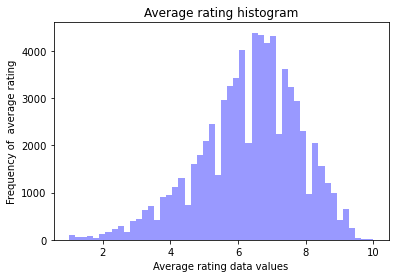

In [172]:
# Plot the histogram of average ratings
# Subset of dataset - average rating
AverRate = df_rating['averagerating']

# Plot the histogram of the data
plt.hist(AverRate, bins=50,color = 'blue', alpha=0.4)

# Add labels and title
plt.xlabel('Average rating data values')
plt.ylabel('Frequency of  average rating')
plt.title('Average rating histogram')

# Show the plot
plt.show()

In [194]:
# Extract the studio column and the other variable from the dataframe
AVG_rate = df_rating['averagerating']
Num_votes = df_rating['numvotes']

# Calculate the frequency of each category in the studio variable
Freq_rate = AVG_rate.value_counts()

# Select the top most frequent categories in the studio variable
def first_15(s):
    return s[:15]

Freq_rate_first_15 = first_15(:15)
print(Freq_rate_first_15)


# Group the data by studio and calculate the mean of numvotes for each group
grouped = df_rating.groupby('averagerating')['numvotes'].mean()

top_15_grouped = grouped[top_15.index]
# Combine the frequency data and the grouped data into a single dataframe
data = pd.DataFrame({'frequency': top_15, 'mean_numvotes': top_15_grouped})

# Sort the data in descending order of the mean of the other variable
data = data.sort_values(by='mean_numvotes', ascending=False)

# Create a grouped bar chart of the top 15 categories in the studio and domestric variables
sns.barplot(x=data.index, y='frequency', data=data, color='blue', alpha=0.5)
sns.barplot(x=data.index, y='mean_foreign', data=data, color='red', alpha=0.5)

# Add labels and title
plt.xticks([i + bar_width/2 for i in studio_index], top_15.index, rotation=90)
plt.xlabel('Studio')
plt.ylabel('Frequency/Mean of foreign gross')
plt.title('Grouped Bar Chart of Studio and foreign gross')

# Show the plot
plt.show()

SyntaxError: invalid syntax (353615477.py, line 12)

IFC       166
Uni.      147
WB        140
Fox       136
Magn.     136
SPC       123
Sony      110
BV        106
LGF       103
Par.      101
Eros       89
Wein.      77
CL         74
Strand     68
FoxS       67
Name: studio, dtype: int64